# Proyecto Final 
---------------------------
Integrantes:
Todos



## Paso 1: Tratamiento de datos

In [2]:
#cargamos las librerias necesarias para trabajar
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy
import matplotlib.pyplot as plt




In [3]:
# instalamos el paquete estadistico
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=b166242dadad7e37ba4a76e2df9e2faad26abbe7bda276d60ba351daec848df9
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built statistics


In [4]:
#cargamos el archivo del Proyecto Final desde nuestra PC, se le nombre 'Data Siniestros.csv'
from google.colab import files
files.upload()

Saving Data_Siniestros en Seguros (2).csv to Data_Siniestros en Seguros (2).csv


{'Data_Siniestros en Seguros (2).csv': b'Cliente_ID,Antig\xfcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0

In [61]:
# Lo cargamos a un DataFrame
seguros = pd.read_csv('Data_Siniestros en Seguros (2).csv',encoding='unicode_escape')
seguros = seguros.drop(seguros.columns[[0]], axis='columns')

seguros.head()

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [62]:
seguros.info() # Vemos la información detallada de las variables   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    5213 non-null   float64
 1   Nivel_Ingresos       5527 non-null   float64
 2   Saldo_Pendiente      5800 non-null   float64
 3   Puntaje_Morosidad1   5800 non-null   int64  
 4   Puntaje_Morosidad2   5614 non-null   float64
 5   Puntaje_Morosidad3   5544 non-null   float64
 6   Puntaje_Morosidad4   5460 non-null   float64
 7   Puntaje_Morosidad5   5397 non-null   float64
 8   Puntaje_Morosidad6   5324 non-null   float64
 9   Saldo_Pendiente_Seg  5800 non-null   float64
 10  Siniestros1          5800 non-null   int64  
 11  Siniestros2          5800 non-null   int64  
 12  Siniestros3          5800 non-null   int64  
 13  Siniestros4          5800 non-null   int64  
 14  Siniestros5          5800 non-null   int64  
 15  Siniestros6          5800 non-null   i

In [94]:
# Data numérica
# 'antiguedad_maxima', 'nivel_ingresos', 'saldo_pendiente', 'Punjate_morosidad1', 'Punjate_morosidad2' , 'Punjate_morosidad3' , 'Punjate_morosidad4' , 'Punjate_morosidad5' , 'Punjate_morosidad6', 'Saldo_pendiente_seg'
data_siniestros_num = seguros.loc[:, ['Antigüedad_Maxima','Nivel_Ingresos','Saldo_Pendiente', 'Saldo_Pendiente_Seg']] 
data_siniestros_num.head(11)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Saldo_Pendiente_Seg
0,44.0,1.0,604.86,0.0
1,79.0,1.0,1006.21,0.0
2,102.0,1.0,299.23,0.0
3,NaN,1.0,645.19,0.0
4,109.0,NaN,218.00,0.0
5,183.0,NaN,10.32,0.0
6,172.0,0.0,3517.07,0.0
7,76.0,1.0,216.52,0.0
8,136.0,0.0,1908.69,0.0
9,171.0,0.0,1895.19,0.0


In [95]:
data_siniestros_num.isnull().sum() 


Antigüedad_Maxima      587
Nivel_Ingresos         273
Saldo_Pendiente          0
Saldo_Pendiente_Seg      0
dtype: int64

In [96]:
# Data categórica 
#'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4' ,'Siniestros5','Siniestros6'
data_siniestros_cat = seguros.loc[:, ['Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5' , 'Puntaje_Morosidad6','Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6','Estado_Siniestro']] 
data_siniestros_cat.head(8)

,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
5,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
6,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
7,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,1,no


In [97]:
data_siniestros_cat.isnull().sum()

Puntaje_Morosidad1       0
Puntaje_Morosidad2     186
Puntaje_Morosidad3     256
Puntaje_Morosidad4     340
Puntaje_Morosidad5     403
Puntaje_Morosidad6     476
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
Estado_Siniestro      1068
dtype: int64

In [99]:
data_siniestros_antiguedad = seguros.loc[:, ['Antigüedad_Maxima']]
data_siniestros_antiguedad.head(8)


,Antigüedad_Maxima
0,44.0
1,79.0
2,102.0
3,NaN
4,109.0
5,183.0
6,172.0
7,76.0


In [100]:
#eliminamos los NaN , para hacer luego una verirficación de medias despues de imputar, guardamos el dataframe sin datos perdidos 
data_siniestros_antiguedad.dropna(subset = ["Antigüedad_Maxima"], axis = 0, inplace = True)


In [102]:
data_siniestros_antiguedad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5213 entries, 0 to 5799
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Antigüedad_Maxima  5213 non-null   float64
dtypes: float64(1)
memory usage: 81.5 KB


In [103]:
df_antiguedad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Antigüedad_Maxima  0 non-null      float64
dtypes: float64(1)
memory usage: 45.4 KB


In [104]:
data_siniestros_nivel_ingresos = seguros.loc[:, ['Nivel_Ingresos']]
data_siniestros_nivel_ingresos.head(8)

,Nivel_Ingresos
0,1.0
1,1.0
2,1.0
3,1.0
4,NaN
5,NaN
6,0.0
7,1.0


In [105]:
data_siniestros_nivel_ingresos.dropna(subset = ["Nivel_Ingresos"], axis = 0, inplace = True)

In [106]:

data_siniestros_nivel_ingresos.head(8)

,Nivel_Ingresos
0,1.0
1,1.0
2,1.0
3,1.0
6,0.0
7,1.0
8,0.0
9,0.0


In [107]:
data_siniestros_nivel_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5527 entries, 0 to 5799
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nivel_Ingresos  5527 non-null   float64
dtypes: float64(1)
memory usage: 86.4 KB


In [108]:
# 2da Imputación no paramétrica. A partir de otras variables. Variables numéricas
from sklearn.impute import KNNImputer

imputacion_NP = KNNImputer(n_neighbors=2)
data_siniestros_numf =imputacion_NP.fit_transform(data_siniestros_num)

data_siniestros_numf

#data_siniestros_numf =  [np.around(x) for x in data_siniestros_numf]
#data_siniestros_numf

array([[4.40000e+01, 1.00000e+00, 6.04860e+02, 0.00000e+00],
       [7.90000e+01, 1.00000e+00, 1.00621e+03, 0.00000e+00],
       [1.02000e+02, 1.00000e+00, 2.99230e+02, 0.00000e+00],
       ...,
       [4.00000e+00, 2.00000e+00, 8.05720e+02, 0.00000e+00],
       [0.00000e+00, 5.00000e-01, 1.00000e-02, 0.00000e+00],
       [4.00000e+00, 0.00000e+00, 1.26159e+03, 0.00000e+00]])

In [110]:
#seteamos el tipo de dato a las variables con la moda
simple = SimpleImputer(strategy='most_frequent')  # Moda
data_siniestros_catf = simple.fit_transform(data_siniestros_cat)

data_siniestros_catf

array([[0, 0.0, 0.0, ..., 0, 0, 'no'],
       [0, 0.0, 0.0, ..., 0, 0, 'no'],
       [0, 0.0, 0.0, ..., 0, 0, 'no'],
       ...,
       [0, 0.0, 0.0, ..., 0, 0, 'no'],
       [0, 0.0, 0.0, ..., 0, 0, 'no'],
       [0, 0.0, 0.0, ..., 0, 0, 'no']], dtype=object)

In [124]:
#almacenamos los datos en un dataframe , las variarbles float o reales
df1 = pd.DataFrame(
    data=data_siniestros_numf,
    columns=['Antigüedad_Maxima','Nivel_Ingresos','Saldo_Pendiente', 'Saldo_Pendiente_Seg'])

df1.isnull().sum()

Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Saldo_Pendiente_Seg    0
dtype: int64

In [130]:
df1= df1.astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Antigüedad_Maxima    5800 non-null   int64
 1   Nivel_Ingresos       5800 non-null   int64
 2   Saldo_Pendiente      5800 non-null   int64
 3   Saldo_Pendiente_Seg  5800 non-null   int64
dtypes: int64(4)
memory usage: 181.4 KB


In [131]:

#creamos y almacenamos la data en un dataframe
df2 = pd.DataFrame(
    data=data_siniestros_catf,
    columns=['Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5' , 'Puntaje_Morosidad6','Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6','Estado_Siniestro'])

#df2.isnull().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Puntaje_Morosidad1  5800 non-null   object
 1   Puntaje_Morosidad2  5800 non-null   object
 2   Puntaje_Morosidad3  5800 non-null   object
 3   Puntaje_Morosidad4  5800 non-null   object
 4   Puntaje_Morosidad5  5800 non-null   object
 5   Puntaje_Morosidad6  5800 non-null   object
 6   Siniestros1         5800 non-null   object
 7   Siniestros2         5800 non-null   object
 8   Siniestros3         5800 non-null   object
 9   Siniestros4         5800 non-null   object
 10  Siniestros5         5800 non-null   object
 11  Siniestros6         5800 non-null   object
 12  Estado_Siniestro    5800 non-null   object
dtypes: object(13)
memory usage: 589.2+ KB


In [132]:
#seteamos el tipo de dato a las variables de siniestros y estado de siniestro
df2 = df2.astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Puntaje_Morosidad1  5800 non-null   object
 1   Puntaje_Morosidad2  5800 non-null   object
 2   Puntaje_Morosidad3  5800 non-null   object
 3   Puntaje_Morosidad4  5800 non-null   object
 4   Puntaje_Morosidad5  5800 non-null   object
 5   Puntaje_Morosidad6  5800 non-null   object
 6   Siniestros1         5800 non-null   object
 7   Siniestros2         5800 non-null   object
 8   Siniestros3         5800 non-null   object
 9   Siniestros4         5800 non-null   object
 10  Siniestros5         5800 non-null   object
 11  Siniestros6         5800 non-null   object
 12  Estado_Siniestro    5800 non-null   object
dtypes: object(13)
memory usage: 589.2+ KB


In [133]:
#ejecutamos el merge(fusión) de datos
data_siniestro_final = pd.merge(df1, df2, left_index=True, right_index=True)
data_siniestro_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Antigüedad_Maxima    5800 non-null   int64 
 1   Nivel_Ingresos       5800 non-null   int64 
 2   Saldo_Pendiente      5800 non-null   int64 
 3   Saldo_Pendiente_Seg  5800 non-null   int64 
 4   Puntaje_Morosidad1   5800 non-null   object
 5   Puntaje_Morosidad2   5800 non-null   object
 6   Puntaje_Morosidad3   5800 non-null   object
 7   Puntaje_Morosidad4   5800 non-null   object
 8   Puntaje_Morosidad5   5800 non-null   object
 9   Puntaje_Morosidad6   5800 non-null   object
 10  Siniestros1          5800 non-null   object
 11  Siniestros2          5800 non-null   object
 12  Siniestros3          5800 non-null   object
 13  Siniestros4          5800 non-null   object
 14  Siniestros5          5800 non-null   object
 15  Siniestros6          5800 non-null   object
 16  Estado

In [134]:
#luego mostramos la fusión de datos ( hasta este punto ya no debemos tener datos perdidos)
data_siniestro_final.head(10)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,44,1,604,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,79,1,1006,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,102,1,299,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,46,1,645,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,109,0,218,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
5,183,0,10,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
6,172,0,3517,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
7,76,1,216,0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,1,no
8,136,0,1908,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
9,171,0,1895,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [135]:
from scipy.stats import wilcoxon

wi_test, p = wilcoxon(data_siniestro_final.Antigüedad_Maxima, df_antiguedad.Antigüedad_Maxima )

print('Prueba de Wilcoxon=%.3f, p-value=%.3f' % (wi_test, p))

Prueba de Wilcoxon=0.000, p-value=0.000


In [ ]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_riesgo_num2_skler = skler.fit_transform(data_siniestros_numf)
data_riesgo_num2_skler

array([[-0.13711552, -0.07257075, -0.42813732, ..., -0.25030531,
        -0.24373321, -0.22578363],
       [ 0.62062471, -0.07257075, -0.36295339, ..., -0.25030531,
        -0.24373321, -0.22578363],
       [ 1.1185683 , -0.07257075, -0.47777521, ..., -0.25030531,
        -0.24373321, -0.22578363],
       ...,
       [-1.00310436,  0.79260987, -0.39551531, ...,  0.43904455,
        -0.24373321, -0.22578363],
       [-1.08970325, -0.50516106, -0.52637204, ...,  4.57514373,
         4.85707522, -0.22578363],
       [-1.00310436, -0.93775138, -0.32147669, ...,  0.43904455,
        -0.24373321, -0.22578363]])

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


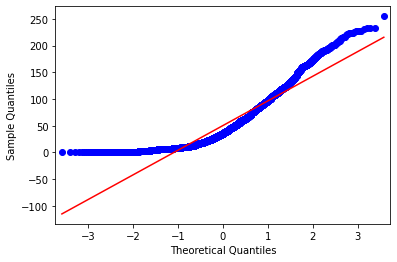

In [ ]:
qqplot(data_siniestro_final['Antigüedad_Maxima'] , line='s')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


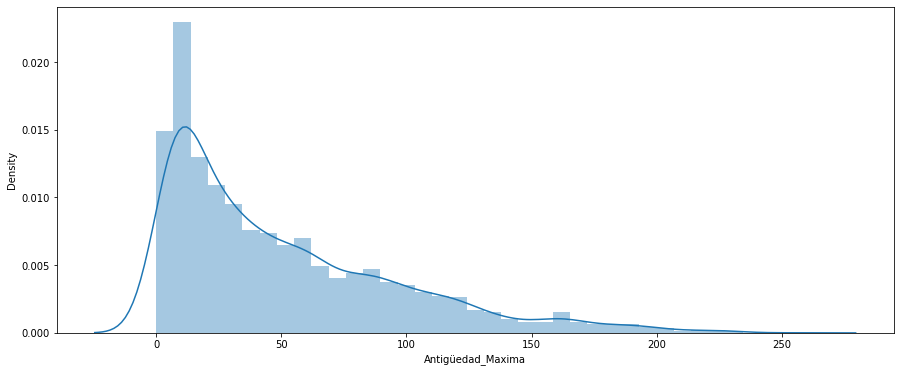

In [ ]:
#Antiguedad_Maxima
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Antigüedad_Maxima'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


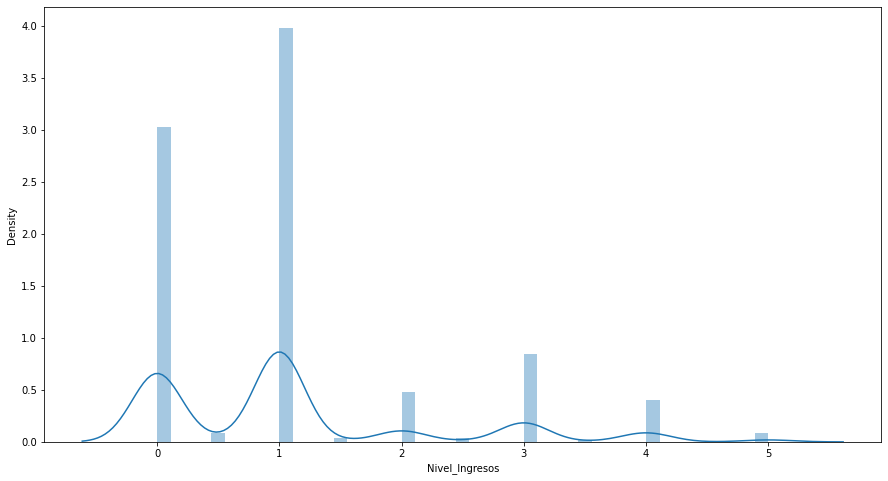

In [ ]:
#Nivel_Ingresos
plt.figure(figsize=(15,8))
sns.distplot(data_siniestro_final['Nivel_Ingresos'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


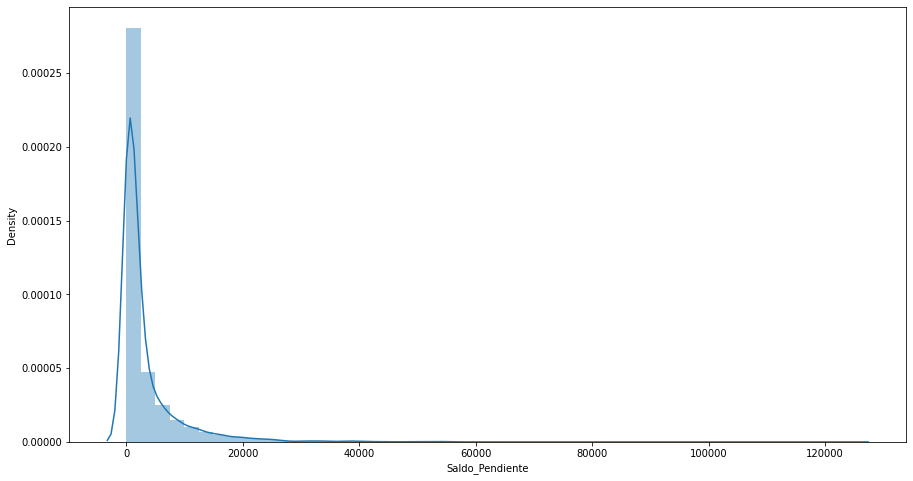

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data_siniestro_final['Saldo_Pendiente'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


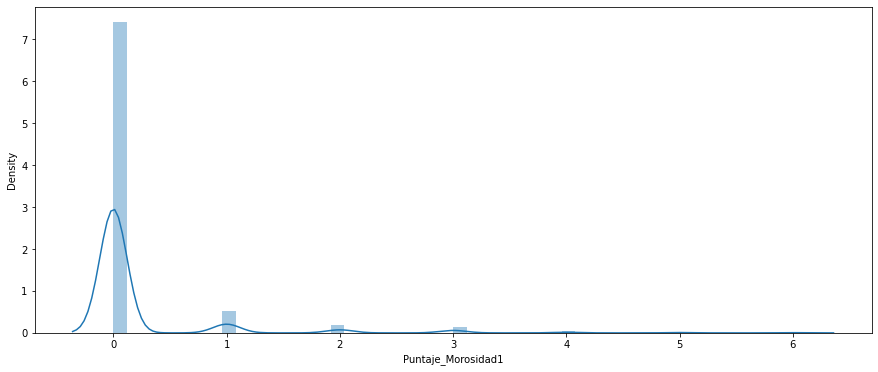

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Puntaje_Morosidad1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


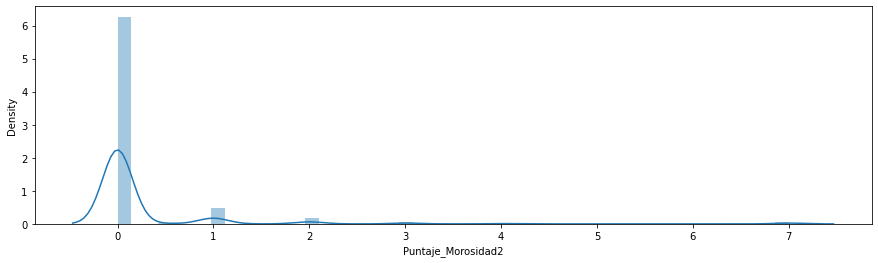

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(data_siniestro_final['Puntaje_Morosidad2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


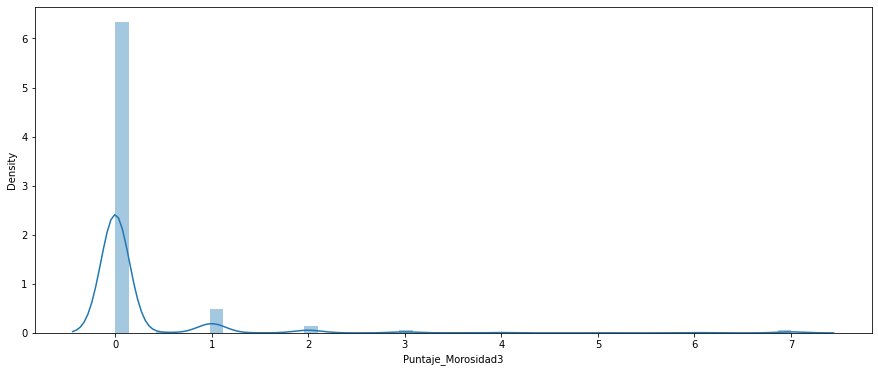

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Puntaje_Morosidad3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


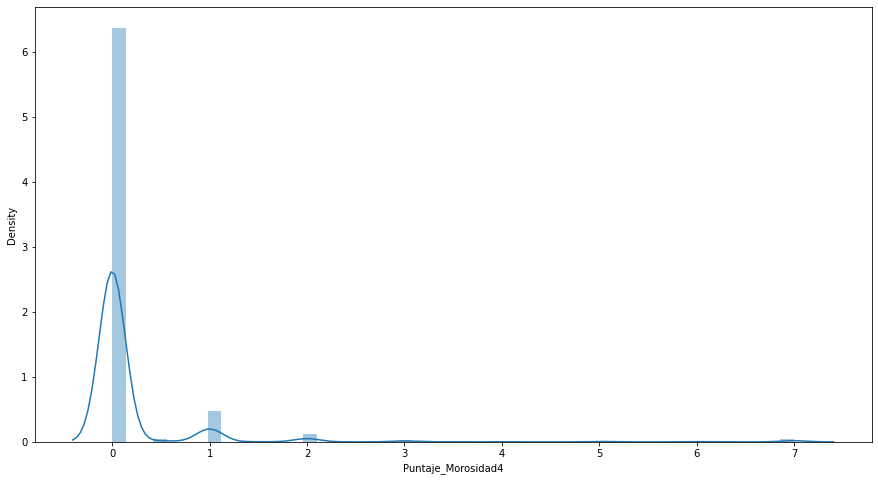

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data_siniestro_final['Puntaje_Morosidad4'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


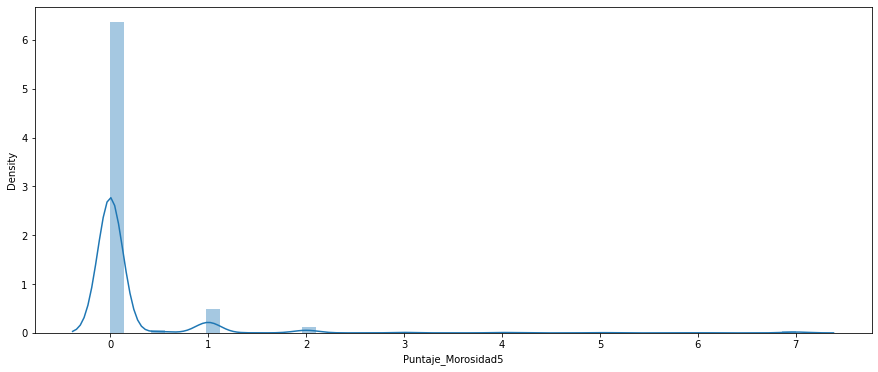

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Puntaje_Morosidad5'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


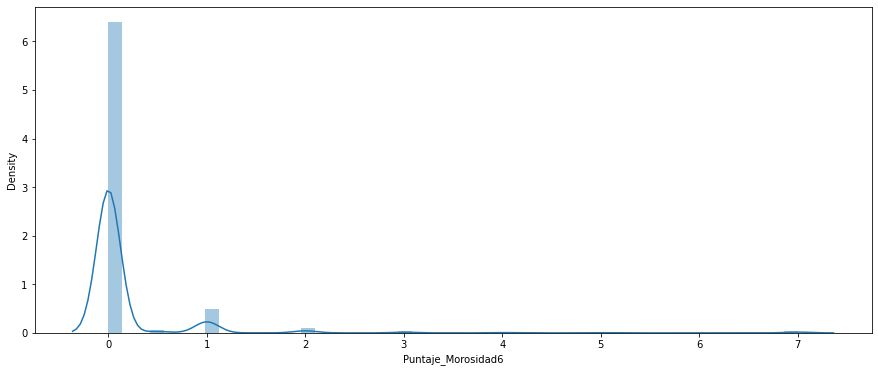

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Puntaje_Morosidad6'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


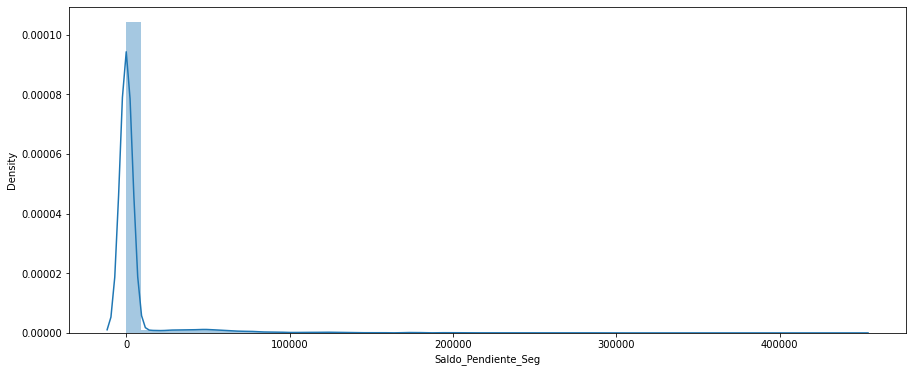

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data_siniestro_final['Saldo_Pendiente_Seg'])
plt.show()

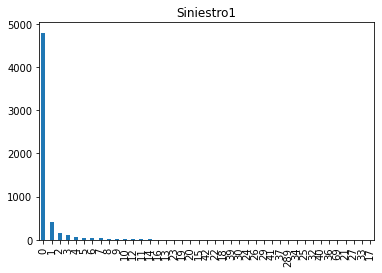

In [ ]:
# Variables cualitativas

d1 = data_siniestro_final.Siniestros1.value_counts()
d1.plot(kind='bar', title='Siniestro1')

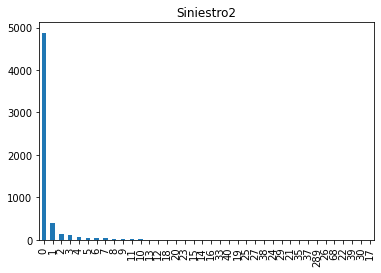

In [ ]:
d1 = data_siniestro_final.Siniestros2.value_counts()
d1.plot(kind='bar', title='Siniestro2')

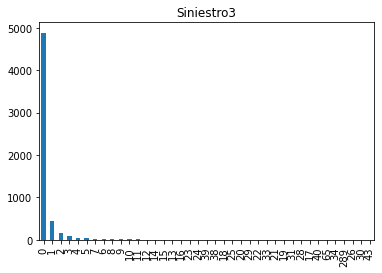

In [ ]:
d1 = data_siniestro_final.Siniestros3.value_counts()
d1.plot(kind='bar', title='Siniestro3')

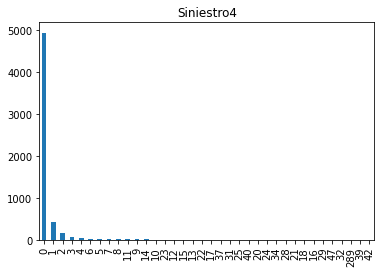

In [ ]:
d1 = data_siniestro_final.Siniestros4.value_counts()
d1.plot(kind='bar', title='Siniestro4')

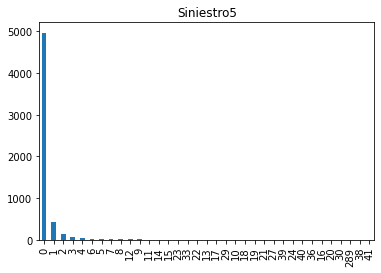

In [ ]:
d1 = data_siniestro_final.Siniestros5.value_counts()
d1.plot(kind='bar', title='Siniestro5')

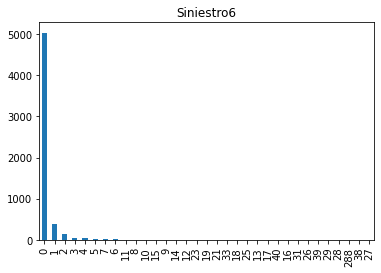

In [ ]:
d1 = data_siniestro_final.Siniestros6.value_counts()
d1.plot(kind='bar', title='Siniestro6')

In [ ]:
#Analisis descriptivo

#data_siniestro_final = data_siniestro_final.fillna(0)
percentiles = [.1, .25, .5, .75, .9]
Descrip = data_siniestro_final.describe(percentiles=percentiles).T
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
Antigüedad_Maxima,5800.0,50.333362,46.193954,0.0,6.000,13.0000,35.000,76.0000,117.000,255.00
Nivel_Ingresos,5800.0,1.083879,1.155928,0.0,0.000,0.0000,1.000,1.0000,3.000,5.00
Saldo_Pendiente,5800.0,3240.983681,6157.722805,0.0,21.761,329.7475,1100.315,3265.3225,8786.782,124102.08
Puntaje_Morosidad1,5800.0,0.199310,0.679003,0.0,0.000,0.0000,0.000,0.0000,1.000,6.00
Puntaje_Morosidad2,5800.0,0.241724,0.882921,0.0,0.000,0.0000,0.000,0.0000,1.000,7.00
Puntaje_Morosidad3,5800.0,0.216293,0.830309,0.0,0.000,0.0000,0.000,0.0000,1.000,7.00
Puntaje_Morosidad4,5800.0,0.190172,0.766072,0.0,0.000,0.0000,0.000,0.0000,1.000,7.00
Puntaje_Morosidad5,5800.0,0.181552,0.725384,0.0,0.000,0.0000,0.000,0.0000,1.000,7.00
Puntaje_Morosidad6,5800.0,0.167241,0.686225,0.0,0.000,0.0000,0.000,0.0000,0.500,7.00
Saldo_Pendiente_Seg,5800.0,4970.516469,22016.410538,0.0,0.000,0.0000,0.000,0.0000,0.000,442334.80


In [ ]:
# Verificamos los duplicados
seguros[seguros["Cliente_ID"].duplicated()].head()

# No se observan duplicados según el ID

KeyError: ignored

In [ ]:
# Revisamos los datos perdidos

seguros.isna().sum()

NameError: ignored

### ANALIZANDO LAS VARIABLES
    1. No se observan duplicados según el ID
    2. Se aprecia 5800 filas y 18 columnas
    3. Se detecta que hay variables con datos perdidos
    4. Es necesario verificar uno por uno el tipo de variable
       *   Cliente_ID -> NO TIENE valores perdidos, typo de variable es CORRECTA
       *   **Antigüedad_Maxima -> SI TIENE valores perdidos, typo de variable es INcorrecta (debe ser int64)**
       *   **Nivel_Ingresos -> SI TIENE valores perdidos, typo de variable es INcorrecta (debe ser CUALITATIVA)**
       *   Saldo_Pendiente -> NO TIENE valores perdidos, typo de variable es CORRECTA
       *   **Puntaje_Morosidad -> SI TIENE valores perdidos, typo de variable es INcorrecta (debe ser CUALITATIVA)**




In [ ]:
# Corregir el tipo de variable cualitativa
var_str = ["Nivel_Ingresos", "Puntaje_Morosidad1", "Puntaje_Morosidad2", "Puntaje_Morosidad3", "Puntaje_Morosidad4", "Puntaje_Morosidad5", "Puntaje_Morosidad6"]
seguros[var_str] = seguros[var_str].astype(str)
#seguros.Antigüedad_Maxima = seguros.Antigüedad_Maxima.fillna(0)
#seguros.Antigüedad_Maxima = seguros.Antigüedad_Maxima.astype(int)
seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5800 non-null   object 
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   object 
 5   Puntaje_Morosidad2   5800 non-null   object 
 6   Puntaje_Morosidad3   5800 non-null   object 
 7   Puntaje_Morosidad4   5800 non-null   object 
 8   Puntaje_Morosidad5   5800 non-null   object 
 9   Puntaje_Morosidad6   5800 non-null   object 
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

(array([2198., 1012.,  720.,  519.,  367.,  155.,  130.,   77.,   30.,
           5.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

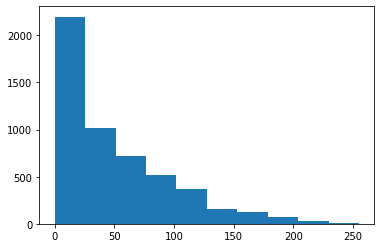

In [ ]:
plt.hist(seguros.Antigüedad_Maxima)

In [ ]:
from scipy.stats import kurtosis

def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))

In [ ]:
seguros.Antigüedad_Maxima.apply(kurtosis_data, axis=0)

TypeError: ignored

asd